In [42]:
import pandas as pd
import os
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt
import re

In [69]:
# load the yaml file to get the reaction equations
path_to_cti = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_models_sim/original/base_modified_pt.yaml'
gas = ct.Solution(path_to_cti, 'gas')
surf = ct.Interface(path_to_cti, 'surface1', [gas])
def eliminate_index(species):
    """
    This function eliminate the indices after species 
    speciess:a list of strings
    """
    new_sp_list = []
    for sp in species:
        new_r = []
        element_num = []
        for num in range(10):
            element_num.append(str(num))
        sp = sp.replace('_', '')
        sp = re.sub(r'\(\d+\)','', sp)
        sp = sp.replace('X', 'Pt')
        sp = re.sub(r'(\d+)',r'_\1', sp)
        sp = '$'+ sp + '$'
        new_sp_list.append(sp) 
    return new_sp_list

def rank_kin(property_idx, ratio, top):
    """
    property_idx: the index of the property to rank, starts from 1 because 0 is species index
    ratio: the ratio to look into
    top: the number of most sensitive reactions to rank
    """
    ori_dir = f'original/kinetic_sensitivity_data/{ratio}_sens_data.csv'
    bm_dir = f'bm/kinetic_sensitivity_data/{ratio}_sens_data.csv'
    dirs = [ori_dir, bm_dir]
    data = []
    for i in range(len(dirs)):
        df = pd.read_csv(dirs[i])
        sens = df.iloc[:, property_idx]
        rxns = df.loc[:, 'Reactions']
        title_name = df.columns[property_idx]
        sens_abs = np.abs(sens) * 1e8
        order = sens_abs.argsort()
        if i == 0:
            ranks = np.flip(order)
        # ranks = np.flip(order)
#         print(np.array(ranks)[:10])
        sens_values = []
        rxn_eqs = []
        for j in ranks[:top]:
            sens_values.append(sens[j])
            rxn_eqs.append(surf.reaction(rxns[j]).equation)
        data.append([sens_values, rxn_eqs])

    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.barh(data[0][1], data[0][0])
    plt.title("Original Sensitivity", fontsize=15)
    plt.xlabel('sensitivity value', fontsize=15)
    plt.ylabel('Reactions', fontsize=15)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=15)

    plt.subplot(1, 2, 2) # index 2
    plt.barh(data[1][1], data[1][0])
    plt.title("BM Sensitvity", fontsize=15)
    plt.xlabel('sensitivity value', fontsize=15)
    plt.ylabel('Reactions', fontsize=15)
    plt.suptitle(f'{title_name} Comparison at C/O input = {ratio}', fontsize=20)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=15)
    plt.subplot(1, 2, 2).yaxis('off')
    plt.tight_layout()
    plt.show()
    
# def rank_therm(property_idx, ratio, top):
#     """
#     property_idx: the index of the property to rank, starts from 1 because 0 is species index
#     ratio: the ratio to look into
#     top: the number of most sensitive reactions to rank
#     """
#     ori_dir = f'original_2000/thermo_sensitivity_data/{ratio}_sens_data.csv'
#     bm_dir = f'bm_2000/thermo_sensitivity_data/{ratio}_sens_data.csv'
#     dirs = [ori_dir, bm_dir]
#     data = []
#     for i in range(len(dirs)):
#         df = pd.read_csv(dirs[i])
#         df.drop(0, inplace=True, axis=0)
#         sens = np.array(df.iloc[:, property_idx])
#         sp = np.array(df.loc[:, 'Species'])
#         title_name = df.columns[property_idx]
#         sens_abs = np.abs(sens) * 1e8
#         order = sens_abs.argsort()
#         if i == 0:
#             ranks = np.flip(order)
#         sens_values = []
#         rxn_eqs = []
#         for j in ranks[:top]:
#             sens_values.append(sens[j])
#             rxn_eqs.append(surf.species(sp[j]).name)
#         data.append([sens_values, rxn_eqs])

#     plt.rcParams["figure.figsize"] = (20,10)
#     plt.subplot(1, 2, 1) # row 1, col 2 index 1
#     plt.barh(data[0][1], data[0][0])
#     plt.title("Original Sensitivity", fontsize=15)
#     plt.xlabel('sensitivity value', fontsize=20)
#     plt.ylabel('Species', fontsize=20)
#     plt.yticks(fontsize=15)
#     plt.xticks(fontsize=15)

#     plt.subplot(1, 2, 2) # index 2
#     plt.barh(data[1][1], data[1][0])
#     plt.title("BM Sensitvity", fontsize=15)
#     plt.xlabel('sensitivity value (\eV)', fontsize=20)
#     plt.ylabel('Species', fontsize=20)
#     plt.suptitle(f'{title_name} Comparison at C/O input = {ratio}', fontsize=20)
#     plt.yticks(fontsize=15)
#     plt.xticks(fontsize=15)
#     plt.tight_layout()
#     plt.show()
def rank_therm(property_idx, ratio, top):
    """
    property_idx: the index of the property to rank, starts from 1 because 0 is species index
    ratio: the ratio to look into
    top: the number of most sensitive reactions to rank
    """
    ori_dir = f'original_2000/thermo_sensitivity_data/{ratio}_sens_data.csv'
    bm_dir = f'bm_2000/thermo_sensitivity_data/{ratio}_sens_data.csv'
    dirs = [ori_dir, bm_dir]
    data = []
    for i in range(len(dirs)):
        df = pd.read_csv(dirs[i])
        df.drop(0, inplace=True, axis=0)
        sens = np.array(df.iloc[:, property_idx])
        sp = np.array(df.loc[:, 'Species'])
        title_name = df.columns[property_idx]
        sens_abs = np.abs(sens) * 1e8
        order = sens_abs.argsort()
        if i == 0:
            ranks = np.flip(order)
        sens_values = []
        rxn_eqs = []
        for j in ranks[:top]:
            sens_values.append(sens[j])
            rxn_eqs.append(surf.species(sp[j]).name)
        data.append([sens_values, rxn_eqs])

    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams.update({'font.size': 24})
    fig, axs = plt.subplots(1, 2, sharey=True)
    # plt.subplot(1, 2, 1) # row 1, col 2 index 1
    ax1 = axs[0]
    ax2 = axs[1]
    sp_names1 = eliminate_index(data[0][1])
    sp_names2 = eliminate_index(data[1][1])
    ax1.barh(sp_names1, data[0][0])
    # ax1.title("Original Sensitivity", fontsize=15)
    ax1.set(xlabel='sensitivity value (\eV)', ylabel='Species')

    # plt.subplot(1, 2, 2) # index 2
    ax2.barh(sp_names2, data[1][0])
    ax2.set(xlabel='sensitivity value (\eV)')
    # plt.suptitle(f'{title_name} Comparison at C/O input = {ratio}', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'therm_sens_plots/therm_sens_{ratio}_{title_name}.pdf', bbox_inches='tight')
    plt.show()

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in cp/R detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  10.615319744584205
	Value computed using high-temperature polynomial: 10.773680323194302

  after removing the cwd from sys.path.
/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in h/RT detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  -16.685067677440152
	Value computed using high-temperature polynomial: -16.696975757668092

  after removing the cwd from sys.path.
/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: NasaPoly2::validate: 
For species CH4OX(43), discontinuity in cp/R detected at Tmid = 850.41
	Value computed using low-temperature polynomi

## Thermo Sensitivity

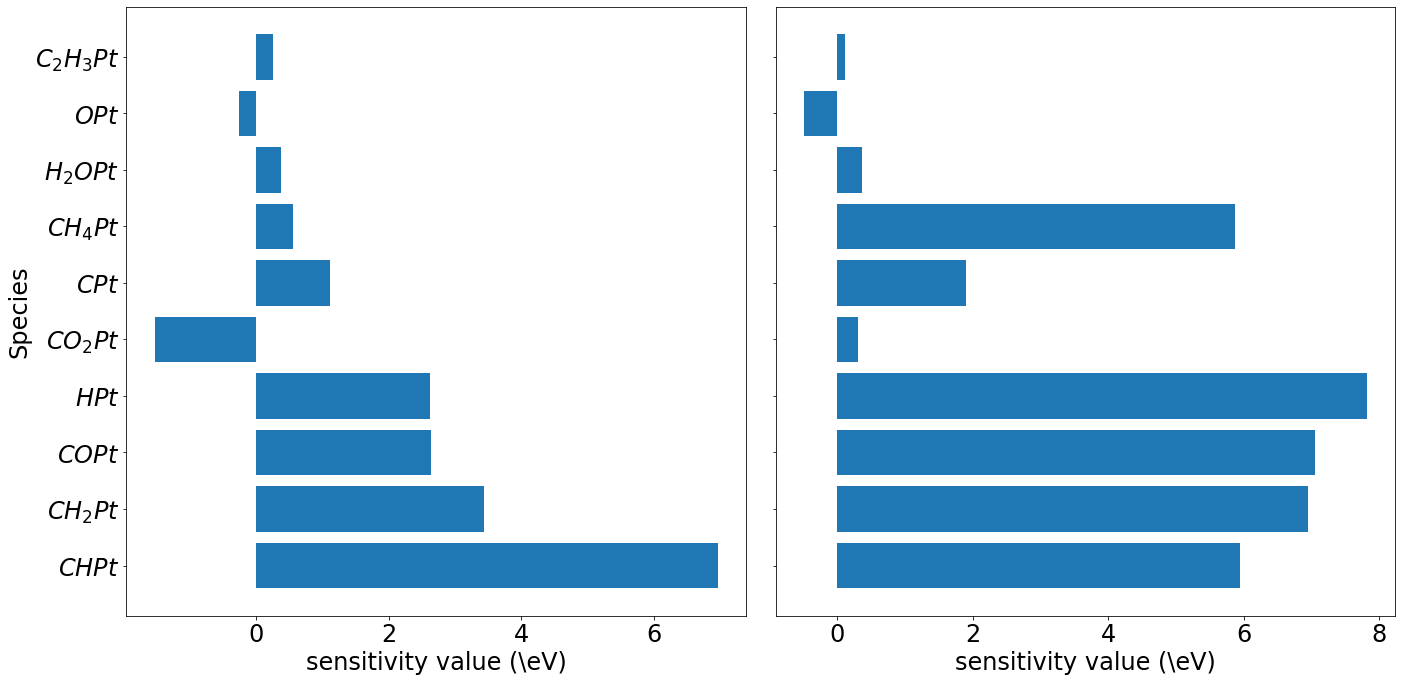

In [70]:
rank_therm(8, 1.0, 10)

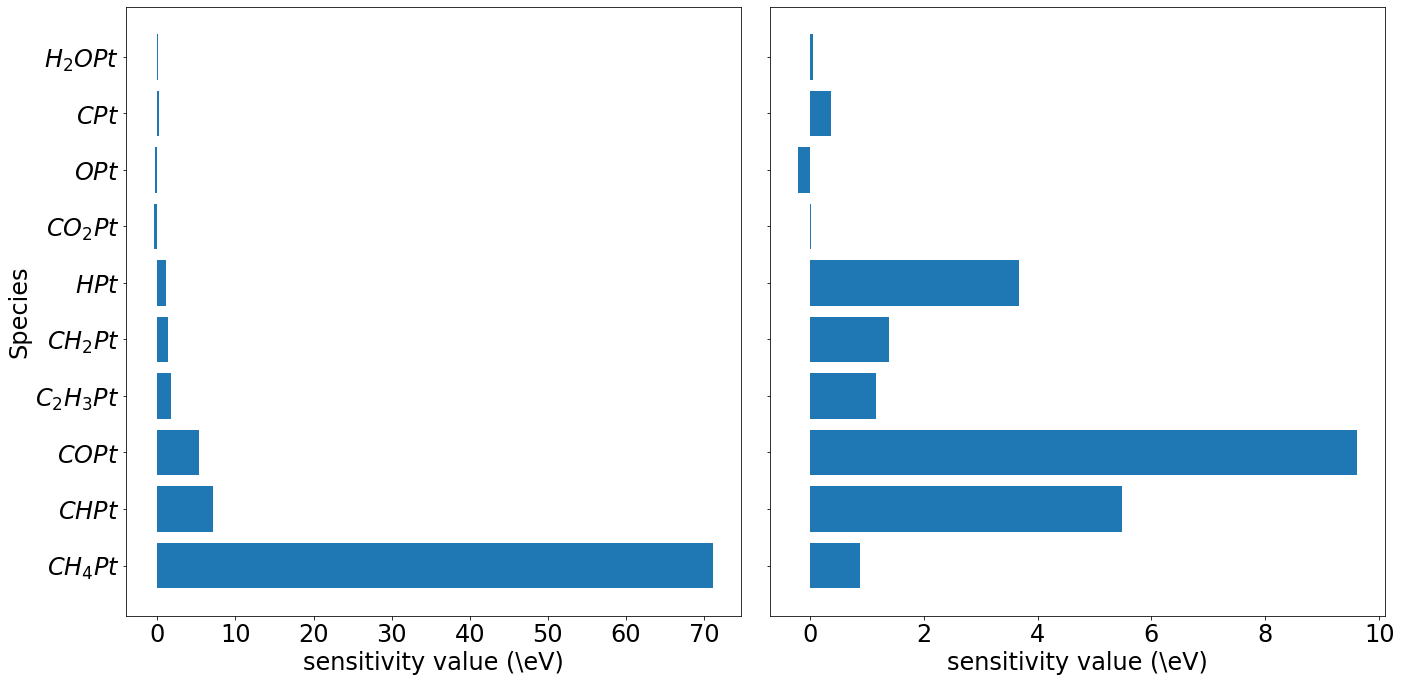

In [71]:
rank_therm(8, 2.6, 10)

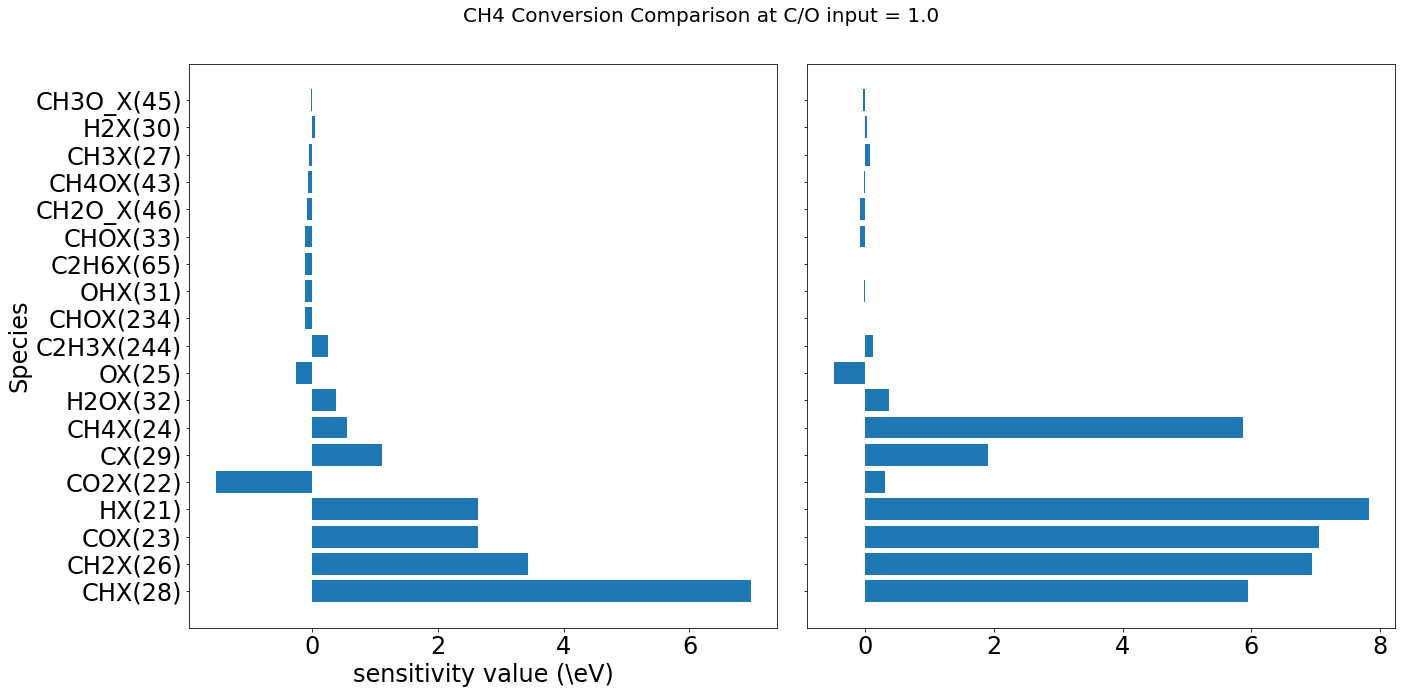

In [3]:
rank_therm(8, 1.0, 20)

In [13]:
def rank_kin_tst(property_idx, ratio, top):
    """
    property_idx: the index of the property to rank, starts from 1 because 0 is species index
    ratio: the ratio to look into
    top: the number of most sensitive reactions to rank
    """
    ori_dir = f'original/kinetic_sensitivity_data/{ratio}_sens_data.csv'
    bm_dir = f'bm/kinetic_sensitivity_data/{ratio}_sens_data.csv'
    dirs = [ori_dir, bm_dir]
    data = []
    for i in range(len(dirs)):
        df = pd.read_csv(dirs[i])
        sens = df.iloc[:, property_idx]
        rxns = df.loc[:, 'Reactions']
        title_name = df.columns[property_idx]
        sens_abs = np.abs(sens) * 1e8
        order = sens_abs.argsort()
        if i == 0:
            ranks = np.flip(order)
        # ranks = np.flip(order)
#         print(np.array(ranks)[:10])
        sens_values = []
        rxn_eqs = []
        for j in ranks[:top]:
            sens_values.append(sens[j])
            rxn_eqs.append(surf.reaction(rxns[j]).equation)
        data.append([sens_values, rxn_eqs])
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams.update({'font.size': 24})
    fig, axs = plt.subplots(1, 2, sharey=True)
    # plt.subplot(1, 2, 1) # row 1, col 2 index 1
    ax1 = axs[0]
    ax2 = axs[1]
    ax1.barh(data[0][1], data[0][0])
    ax1.set_title("Original Sensitivity", fontsize=15)
    ax1.set(xlabel='sensitivity value', ylabel='Reactions')
    # ax1.yticks(fontsize=12)
    # ax1.xticks(fontsize=15)

    # plt.subplot(1, 2, 2) # index 2
    ax2.barh(data[1][1], data[1][0])
    ax2.set_title("BM Sensitvity", fontsize=15)
    ax2.set(xlabel='sensitivity value')
    # plt.xlabel('sensitivity value', fontsize=15)
    # plt.ylabel('Reactions', fontsize=15)
    plt.suptitle(f'{title_name} Comparison at C/O input = {ratio}', fontsize=20)
    # plt.yticks(fontsize=12)
    # plt.xticks(fontsize=15)
    plt.tight_layout()
    plt.show()
    
def rank_therm_tst(property_idx, ratio, top):
    """
    property_idx: the index of the property to rank, starts from 1 because 0 is species index
    ratio: the ratio to look into
    top: the number of most sensitive reactions to rank
    """
    ori_dir = f'original_2000/thermo_sensitivity_data/{ratio}_sens_data.csv'
    bm_dir = f'bm_2000/thermo_sensitivity_data/{ratio}_sens_data.csv'
    dirs = [ori_dir, bm_dir]
    data = []
    for i in range(len(dirs)):
        df = pd.read_csv(dirs[i])
        df.drop(0, inplace=True, axis=0)
        sens = np.array(df.iloc[:, property_idx])
        sp = np.array(df.loc[:, 'Species'])
        title_name = df.columns[property_idx]
        sens_abs = np.abs(sens) * 1e8
        order = sens_abs.argsort()
        if i == 0:
            ranks = np.flip(order)
        sens_values = []
        rxn_eqs = []
        for j in ranks[:top]:
            sens_values.append(sens[j])
            rxn_eqs.append(surf.species(sp[j]).name)
        data.append([sens_values, rxn_eqs])

    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams.update({'font.size': 24})
    fig, axs = plt.subplots(1, 2, sharey=True)
    # plt.subplot(1, 2, 1) # row 1, col 2 index 1
    ax1 = axs[0]
    ax2 = axs[1]
    ax1.barh(data[0][1], data[0][0])
    # ax1.title("Original Sensitivity", fontsize=15)
    ax1.set(xlabel='sensitivity value (\eV)', ylabel='Species')

    # plt.subplot(1, 2, 2) # index 2
    ax2.barh(data[1][1], data[1][0])
    ax1.set(xlabel='sensitivity value (\eV)')
    plt.suptitle(f'{title_name} Comparison at C/O input = {ratio}', fontsize=20)
    plt.tight_layout()
    plt.show()

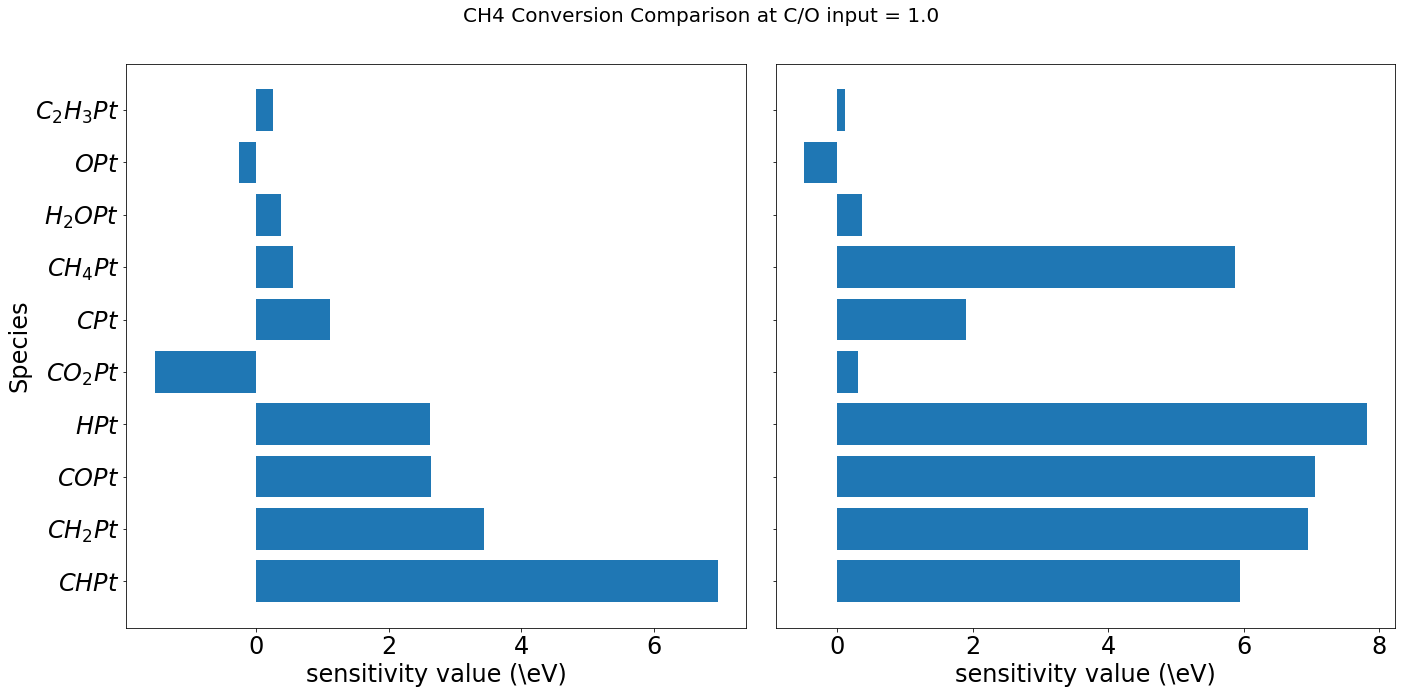

In [61]:
rank_therm(8, 1.0, 10)

In [11]:
a = []
for s in surf.species():
    a.append(s.name)
a

['X(1)',
 'HX(21)',
 'CO2X(22)',
 'COX(23)',
 'CH4X(24)',
 'OX(25)',
 'CH2X(26)',
 'CH3X(27)',
 'CHX(28)',
 'CX(29)',
 'H2X(30)',
 'OHX(31)',
 'H2OX(32)',
 'CHOX(33)',
 'CHOX(234)',
 'CH3O_X(45)',
 'CH4OX(43)',
 'C2H3X(244)',
 'CH2O_X(46)',
 'C2H6X(65)']